In [1]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns

In [2]:
def g(sigma2, q):
    return 1/np.sqrt(1+3*q**2*sigma2/(np.pi**2))


In [3]:
def E(r, rj, g, Home, HomeAway):
    return 1/(1+10**(-g*(r-rj+HomeAway*Home)/400))

In [4]:
gs=[]
for i in range(500):
    gs.append(g(i**2, np.log(10)/400))

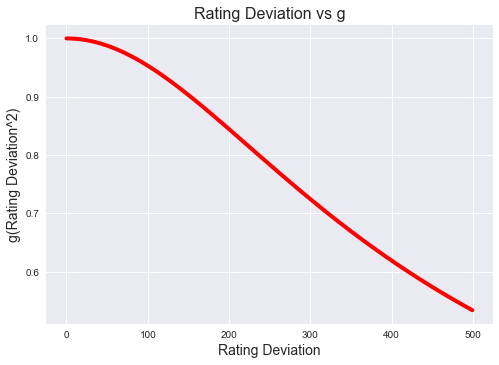

In [5]:
plt.plot(gs, color='red', linewidth=4.0)
plt.xlabel('Rating Deviation', fontsize=14)
plt.ylabel('g(Rating Deviation^2)', fontsize=14)
plt.title('Rating Deviation vs g', fontsize=16)
plt.savefig('RatingDeviationg.png')

plt.show()

In [8]:
q=np.log(10)/400
g(350**2, q)

0.66906939718198455

In [9]:
E(1500, 1750, g(350**2, q), 0, 0)

0.27630428859875855

In [10]:
E(1500, 1750, g(50**2, q), 0, 0)

0.19445290494323406

In [11]:
q=np.log(10)/400
def kfactor(sigma, E):
    idelta=(q**2)*(g(sigma**2)**2)*E*(1-E)
    delta=1/idelta
    denom=1/sigma**2+1/delta
    return q/denom*g(sigma**2)

In [12]:
def g(sigma2):
    return 1/np.sqrt(1+3*q**2*sigma2/(np.pi**2))

In [13]:
g(350**2)

0.66906939718198455

In [14]:
kfactor(50, .5)

13.931867364910152

In [17]:
factors=[]
xaxis=[]
xline=np.linspace(13.8, 13.8, 1000)
for i in np.linspace(20,100,1000):
    xaxis.append(i)
    factors.append(kfactor(i, .9))

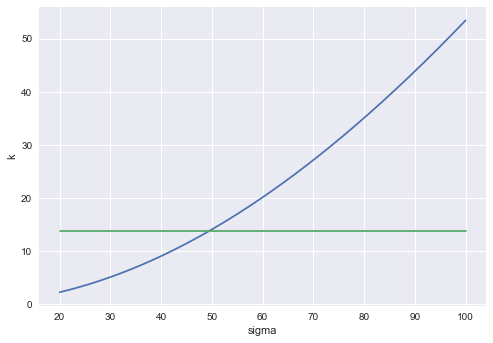

In [18]:
plt.plot(xaxis, factors)
plt.plot(xaxis, xline)
plt.xlabel('sigma')
plt.ylabel('k')
plt.show()

In [55]:
xaxis

[0.10000000000000001,
 10.09,
 20.080000000000002,
 30.07,
 40.060000000000002,
 50.050000000000004,
 60.039999999999999,
 70.030000000000001,
 80.019999999999996,
 90.009999999999991,
 100.0]